## Сравнение двух моделей, разница лишь в том, что в первой используется Dropout, а во второй BatchNormalization

In [1]:
import tensorflow.keras as keras

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [4]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
FAST_RUN = False

In [5]:
second_net = Sequential()
second_net.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
second_net.add(MaxPooling2D(pool_size=(2, 2)))
second_net.add(Dropout(0.25))

second_net.add(Conv2D(64, (3, 3), activation='relu'))
second_net.add(MaxPooling2D(pool_size=(2, 2)))
second_net.add(Dropout(0.25))

second_net.add(Conv2D(128, (3, 3), activation='relu'))
second_net.add(MaxPooling2D(pool_size=(2, 2)))
second_net.add(Dropout(0.25))

second_net.add(Flatten())
second_net.add(Dense(512, activation='relu'))
second_net.add(Dropout(0.5))
second_net.add(Dense(2, activation='softmax'))

second_net.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

second_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [6]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [7]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./dataset/training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('./dataset/test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
total_validate = 8000
total_train = 2000
batch_size = 13

epochs = 3 if FAST_RUN else 20
second_history = second_net.fit_generator(
    training_set, 
    epochs = epochs,
    validation_data = test_set,
    validation_steps = total_validate // batch_size,
    steps_per_epoch = total_train // batch_size,
    callbacks = callbacks
)

Epoch 1/20
153/153 [==============================] - 263s 2s/step - loss: 0.7301 - accuracy: 0.5198 - val_loss: 0.6854 - val_accuracy: 0.5481
Epoch 2/20
153/153 [==============================] - 223s 1s/step - loss: 0.6783 - accuracy: 0.5864 - val_loss: 0.6432 - val_accuracy: 0.6658
Epoch 3/20
153/153 [==============================] - 220s 1s/step - loss: 0.6461 - accuracy: 0.6289 - val_loss: 0.6193 - val_accuracy: 0.6671
Epoch 4/20
153/153 [==============================] - 235s 2s/step - loss: 0.6375 - accuracy: 0.6444 - val_loss: 0.6336 - val_accuracy: 0.6258
Epoch 5/20
152/153 [============================>.] - ETA: 0s - loss: 0.6087 - accuracy: 0.6719
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
153/153 [==============================] - 225s 1s/step - loss: 0.6079 - accuracy: 0.6724 - val_loss: 0.6884 - val_accuracy: 0.6430
Epoch 6/20
153/153 [==============================] - 218s 1s/step - loss: 0.5836 - accuracy: 0.6844 - val_loss: 0.5679 

#### Посмотрим на loss и accuracy на train и test выборках второй модели

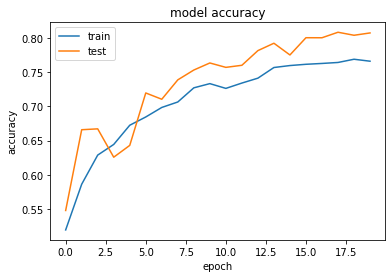

In [9]:
plt.plot(second_history.history['accuracy'])
plt.plot(second_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

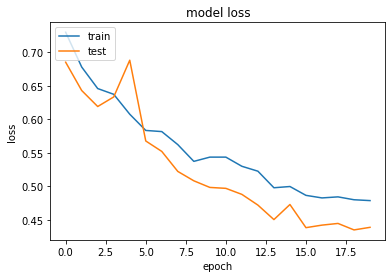

In [10]:
plt.plot(second_history.history['loss'])
plt.plot(second_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
third_net = Sequential()
third_net.add(Conv2D(32, (3, 3), input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
third_net.add(BatchNormalization())
third_net.add(Activation("relu"))
third_net.add(MaxPooling2D(pool_size=(2, 2)))


third_net.add(Conv2D(64, (3, 3)))
third_net.add(BatchNormalization())
third_net.add(Activation("relu"))
third_net.add(MaxPooling2D(pool_size=(2, 2)))

third_net.add(Conv2D(128, (3, 3)))
third_net.add(BatchNormalization())
third_net.add(Activation("relu"))
third_net.add(MaxPooling2D(pool_size=(2, 2)))

third_net.add(Flatten())
third_net.add(Dense(512))
third_net.add(BatchNormalization())
third_net.add(Activation("relu"))
third_net.add(Dense(2, activation='softmax'))

third_net.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

third_net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 64)       

In [12]:
total_validate = 8000
total_train = 2000
batch_size = 13

epochs = 3 if FAST_RUN else 20
third_history = third_net.fit_generator(
    training_set, 
    epochs = epochs,
    validation_data = test_set,
    validation_steps = total_validate // batch_size,
    steps_per_epoch = total_train // batch_size,
    callbacks = callbacks
)

Epoch 1/20
153/153 [==============================] - 276s 2s/step - loss: 0.8073 - accuracy: 0.6266 - val_loss: 0.9804 - val_accuracy: 0.4996
Epoch 2/20
153/153 [==============================] - 267s 2s/step - loss: 0.6277 - accuracy: 0.6614 - val_loss: 0.6222 - val_accuracy: 0.6396
Epoch 3/20
153/153 [==============================] - 143s 932ms/step - loss: 0.5822 - accuracy: 0.6932 - val_loss: 0.5671 - val_accuracy: 0.7084
Epoch 4/20
153/153 [==============================] - 181s 1s/step - loss: 0.5357 - accuracy: 0.7326 - val_loss: 0.6086 - val_accuracy: 0.6964
Epoch 5/20
153/153 [==============================] - 192s 1s/step - loss: 0.5229 - accuracy: 0.7398 - val_loss: 0.5271 - val_accuracy: 0.7433
Epoch 6/20
153/153 [==============================] - 183s 1s/step - loss: 0.4936 - accuracy: 0.7618 - val_loss: 0.6867 - val_accuracy: 0.7016
Epoch 7/20
152/153 [============================>.] - ETA: 0s - loss: 0.4830 - accuracy: 0.7656
Epoch 00007: ReduceLROnPlateau reducing lea

#### Посмотрим на loss и accuracy на train и test выборках третьей модели

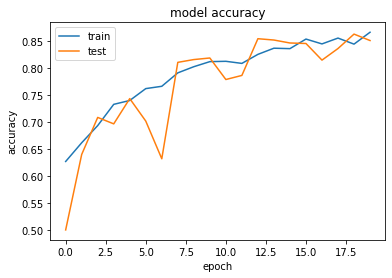

In [13]:
plt.plot(third_history.history['accuracy'])
plt.plot(third_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

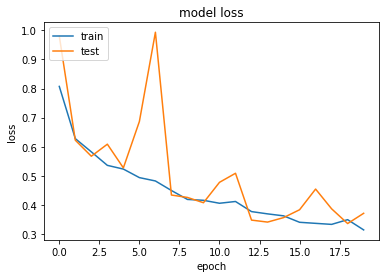

In [14]:
plt.plot(third_history.history['loss'])
plt.plot(third_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Теперь сравним эти две сетки 

#### Для начала посмотрим на показатели на train выборке

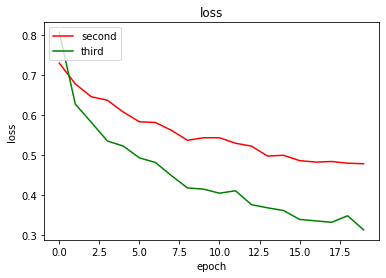

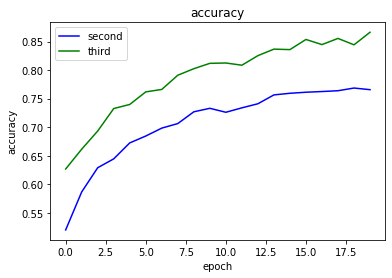

In [22]:
plt.figure(0)
plt.plot(second_history.history['loss'], color='red')
plt.plot(third_history.history['loss'], color='green')
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['second', 'third'], loc='upper left')

plt.figure(1)
plt.plot(second_history.history['accuracy'], color='blue')
plt.plot(third_history.history['accuracy'], color='green')
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['second', 'third'], loc='upper left')

plt.show()

#### Теперь посмотрим результаты на test выборке

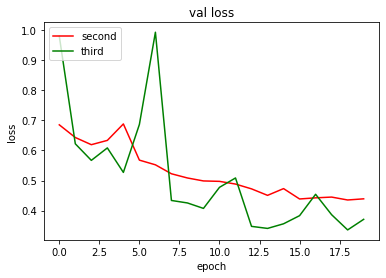

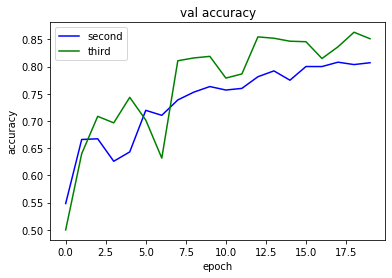

In [24]:
plt.figure(2)
plt.plot(second_history.history['val_loss'], color='red')
plt.plot(third_history.history['val_loss'], color='green')
plt.title('val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['second', 'third'], loc='upper left')

plt.figure(3)
plt.plot(second_history.history['val_accuracy'], color='blue')
plt.plot(third_history.history['val_accuracy'], color='green')
plt.title('val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['second', 'third'], loc='upper left')

plt.show()

In [17]:
#сохраним на всякий случай
second_net.save_weights("sec2.h5")
third_net.save_weights("third3.h5")

#### Подведем итоги:
Третья модель обучается заметно быстрее второй. Так же можно сказать, что и точность ее на test выборке лучше